In [16]:
using XGPaint
using Healpix
# using JLD2

## Load halos from HDF5 files
halo_pos, halo_mass = read_halo_catalog_hdf5(
    "/tigress/zequnl/xgpaint/websky_halos-light.hdf5");

In [17]:
# establish a CIB model and cosmology
cosmo = get_cosmology(h=0.7f0, OmegaM=0.25f0)
radio_model = Radio_Sehgal2009{Float32}(a_0=-1.0)

@time begin
    sources = generate_sources(radio_model, cosmo, halo_pos, halo_mass);
end;

Culling halos below mass 1.0e13.
Allocating for 47424312 halos.
Populating HOD.
Drawing spectral coefficients.
Drawing from luminosity function.
Drawing for impact parameter.
  6.739842 seconds (21.18 k allocations: 7.472 GiB, 15.54% gc time)


In [18]:
@time begin
m = HealpixMap{Float64,RingOrder}(radio_model.nside)
flux_I, redshift_I, θ_I, ϕ_I, flux_II, redshift_II, θ_II, ϕ_II = paint!(
    m, 151f6, radio_model, sources, return_fluxes=true)
end

  6.591981 seconds (264 allocations: 7.112 GiB, 14.95% gc time)


(Float32[5.2722835f-6, 9.7886905f-6, 8.039311f-6, 4.3868754f-6, 2.795174f-6, 1.5649952f-5, 4.087083f-5, 1.5637861f-5, 1.7340175f-5, 8.038478f-6  …  4.094189f-5, 1.9459756f-5, 1.0778898f-5, 1.2341314f-5, 1.3890056f-5, 2.4319681f-5, 2.5665975f-5, 3.197692f-5, 2.5764559f-5, 4.396596f-5], Float32[3.6670613, 3.6670613, 3.6670613, 3.677599, 3.677599, 3.677599, 2.2925196, 2.2925196, 2.2925196, 2.2925196  …  2.6732478, 2.6732478, 2.6732478, 2.6732478, 2.654457, 2.654457, 2.654457, 2.654457, 2.654457, 2.654457], Float32[1.6400945, 1.6400945, 1.6400945, 1.6904302, 1.6904302, 1.6904302, 2.8760047, 2.8760047, 2.8760047, 2.8760047  …  1.2887435, 1.2887435, 1.2887435, 1.2887435, 1.2791083, 1.2791083, 1.2791083, 1.2791083, 1.2791083, 1.2791083], Float32[3.2286189, 3.2286189, 3.2286189, 3.208916, 3.208916, 3.208916, 3.6052969, 3.6052969, 3.6052969, 3.6052969  …  1.1000723, 1.1000723, 1.1000723, 1.1000723, 1.1407623, 1.1407623, 1.1407623, 1.1407623, 1.1407623, 1.1407623], Float32[4.59642f-5, 4.4224933f

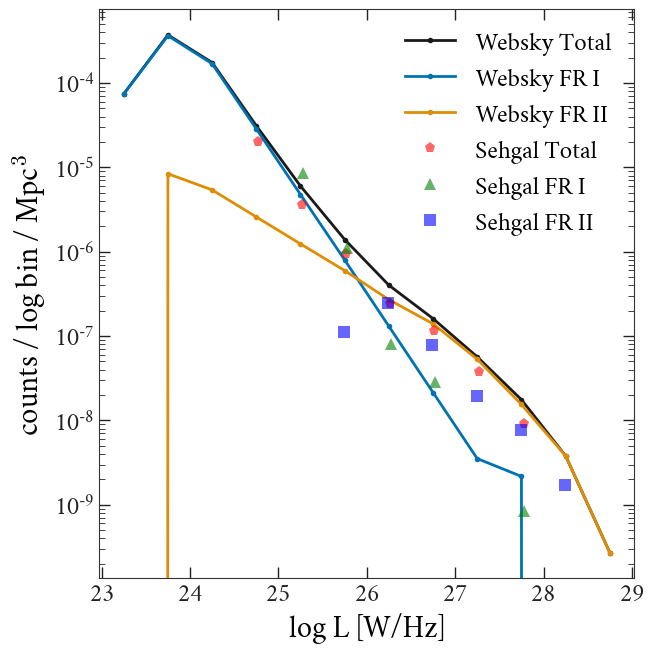

In [19]:

using DelimitedFiles
using Unitful
using UnitfulAstro
using Cosmology
using PyPlot
using StatsBase

figure(figsize=(7,7))

sehgal_red = readdlm("../examples/data/sehgal_figure8_red.txt", ',', Float64, '\n')
sehgal_blue = readdlm("../examples/data/sehgal_figure8_blue.txt", ',', Float64, '\n')
sehgal_green = readdlm("../examples/data/sehgal_figure8_green.txt", ',', Float64, '\n')

vol = ustrip(u"Mpc^3",comoving_volume(cosmo, 0.3))
bins = (range(23, stop=29, step=0.5));
mids = (bins[2:end] .+ bins[1:end-1]) ./ 2.0
count_I = fit(Histogram, log10.(sources.L_I_151[redshift_I .< 0.3]), bins).weights
count_II = fit(Histogram, log10.(sources.L_II_151[redshift_II .< 0.3]), bins).weights

plot(mids, (count_I .+ count_II) ./ diff((bins)) ./ vol, label="Websky Total" )
plot(mids, count_I ./ diff((bins)) ./ vol, label="Websky FR I" )
plot(mids, count_II ./ diff((bins)) ./ vol, label="Websky FR II" )


plot(log10.(sehgal_red[:, 1]), sehgal_red[:, 2], "rp",
    label = "Sehgal Total", alpha = 0.6)
plot(log10.(sehgal_green[:, 1]), sehgal_green[:, 2], color = "green",
    "^", label = "Sehgal FR I", alpha = 0.6)
plot(log10.(sehgal_blue[:, 1]), sehgal_blue[:, 2], color = "blue", "s",
    label = "Sehgal FR II", alpha = 0.6)

ylabel("counts / log bin / Mpc\$^3\$")
xlabel("log L [W/Hz]")
yscale("log")

legend()
tight_layout()

In [ ]:
# using PyPlot
# plt.figure(figsize=(6,6))

# bins = (range(-4.1, stop=2.5, step=0.2));
# mids = (bins[2:end] .+ bins[1:end-1]) ./ 2.0

# flux_I, redshift_I, θ_I, ϕ_I, flux_II, redshift_II, θ_II, ϕ_II = paint!(
#     m, 1.4f9, radio_model, sources, return_fluxes=true)
# count_I = fit(Histogram, log10.(flux_I), bins).weights
# count_II = fit(Histogram, log10.(flux_II), bins).weights


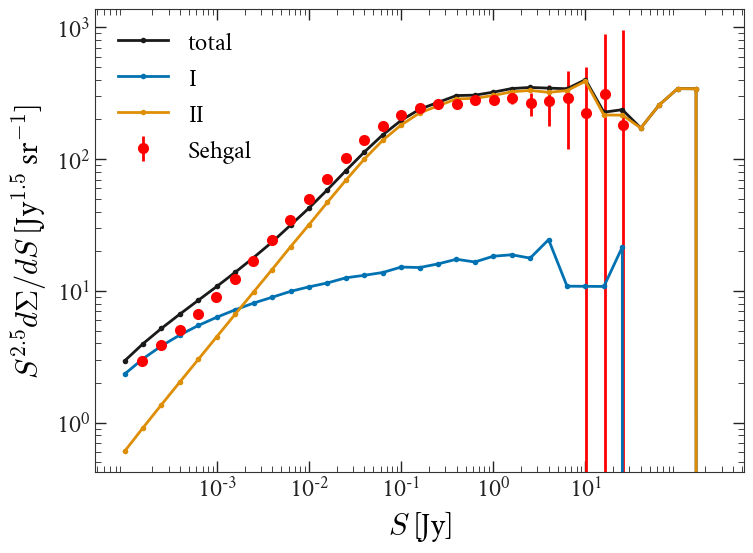

'Cochineal-Roman.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


In [47]:
plt.figure(figsize=(8,6))

bins = (range(-4.1, stop=2.5, step=0.2));
mids = (bins[2:end] .+ bins[1:end-1]) ./ 2.0

flux_I, redshift_I, θ_I, ϕ_I, flux_II, redshift_II, θ_II, ϕ_II = paint!(
    m, 1.4f9, radio_model, sources, return_fluxes=true)
count_I = fit(Histogram, log10.(flux_I), bins).weights
count_II = fit(Histogram, log10.(flux_II), bins).weights

Sehgal = readdlm("../examples/data/sehgal_fig9_1.4GHz.txt", ',', Float64, '\n');
errorbar(Sehgal[:,1], Sehgal[:,2], yerr=sqrt.(Sehgal[:,2]) .* Sehgal[:,1].^(2.5/2), marker="o", color="r",
    ls="None",label="Sehgal")

plot(10 .^ mids, (count_I .+ count_II) .* (10 .^ mids) .^ 2.5 ./ diff(10 .^ bins) / (4π), label = "total")
plot(10 .^ mids, count_I .* (10 .^ mids) .^ 2.5 ./ diff(10 .^ bins) / (4π), label = "I")
plot(10 .^ mids, count_II .* (10 .^ mids) .^ 2.5 ./ diff(10 .^ bins) / (4π), label = "II")



yscale("log")
xscale("log")
xlabel("\$ S \$ [Jy]")
ylabel("\$ S^{2.5} d\\Sigma / dS \$ [Jy\$^{1.5}\$ sr\$^{-1}\$]")
xticks(10 .^ [-3.,-2.,-1.,0.,1.])
legend()
tight_layout()
savefig("sehgal_compare_1.4GHz.pdf")

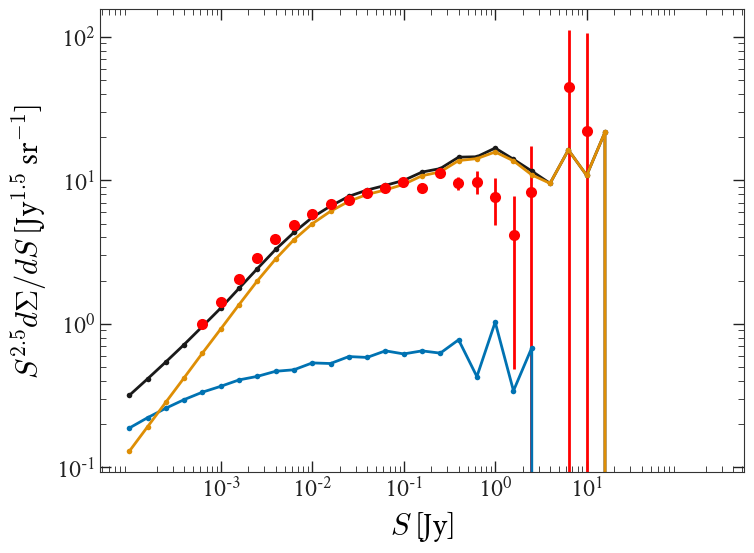

'Cochineal-Roman.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


In [48]:

plt.figure(figsize=(8,6))

bins = (range(-4.1, stop=2.5, step=0.2));
mids = (bins[2:end] .+ bins[1:end-1]) ./ 2.0

flux_I, redshift_I, θ_I, ϕ_I, flux_II, redshift_II, θ_II, ϕ_II = paint!(
    m, 33f9, radio_model, sources, return_fluxes=true)
count_I = fit(Histogram, log10.(flux_I), bins).weights
count_II = fit(Histogram, log10.(flux_II), bins).weights

Sehgal = readdlm("../examples/data/sehgal_fig9_33GHz.txt", ',', Float64, '\n');
errorbar(Sehgal[:,1], Sehgal[:,2], yerr=sqrt.(Sehgal[:,2]) .* Sehgal[:,1].^(2.5/2), marker="o", color="r",
    ls="None",label="Sehgal 33 GHz")

plot(10 .^ mids, (count_I .+ count_II) .* (10 .^ mids) .^ 2.5 ./ diff(10 .^ bins) / (4π), label = "total")
plot(10 .^ mids, count_I .* (10 .^ mids) .^ 2.5 ./ diff(10 .^ bins) / (4π), label = "I")
plot(10 .^ mids, count_II .* (10 .^ mids) .^ 2.5 ./ diff(10 .^ bins) / (4π), label = "II")

yscale("log")
xscale("log")
xlabel("\$ S \$ [Jy]")
ylabel("\$ S^{2.5} d\\Sigma / dS \$ [Jy\$^{1.5}\$ sr\$^{-1}\$]")
xticks(10 .^ [-3.,-2.,-1.,0.,1.])
# legend()
tight_layout()
savefig("sehgal_compare_33GHz.pdf")

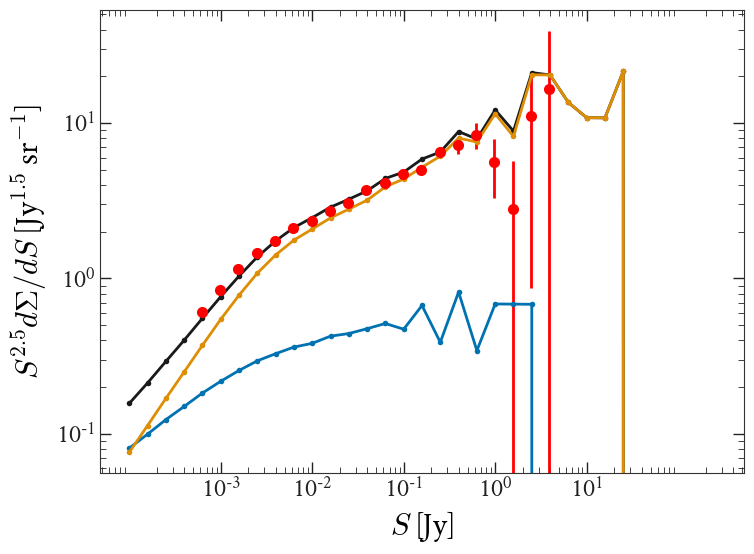

'Cochineal-Roman.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


In [49]:
##
plt.figure(figsize=(8,6))

bins = (range(-4.1, stop=2.5, step=0.2));
mids = (bins[2:end] .+ bins[1:end-1]) ./ 2.0

flux_I, redshift_I, θ_I, ϕ_I, flux_II, redshift_II, θ_II, ϕ_II = paint!(
    m, 95f9, radio_model, sources, return_fluxes=true)
count_I = fit(Histogram, log10.(flux_I), bins).weights
count_II = fit(Histogram, log10.(flux_II), bins).weights

Sehgal = readdlm("../examples/data/sehgal_fig9_95GHz.txt", ',', Float64, '\n');
errorbar(Sehgal[:,1], Sehgal[:,2], yerr=sqrt.(Sehgal[:,2]) .* Sehgal[:,1].^(2.5/2), marker="o", color="r",
    ls="None",label="Sehgal 95 GHz")

plot(10 .^ mids, (count_I .+ count_II) .* (10 .^ mids) .^ 2.5 ./ diff(10 .^ bins) / (4π), label = "total")
plot(10 .^ mids, count_I .* (10 .^ mids) .^ 2.5 ./ diff(10 .^ bins) / (4π), label = "I")
plot(10 .^ mids, count_II .* (10 .^ mids) .^ 2.5 ./ diff(10 .^ bins) / (4π), label = "II")

yscale("log")
xscale("log")
xlabel("\$ S \$ [Jy]")
ylabel("\$ S^{2.5} d\\Sigma / dS \$ [Jy\$^{1.5}\$ sr\$^{-1}\$]")
xticks(10 .^ [-3.,-2.,-1.,0.,1.])
# legend()
tight_layout()
savefig("sehgal_compare_95GHz.pdf")

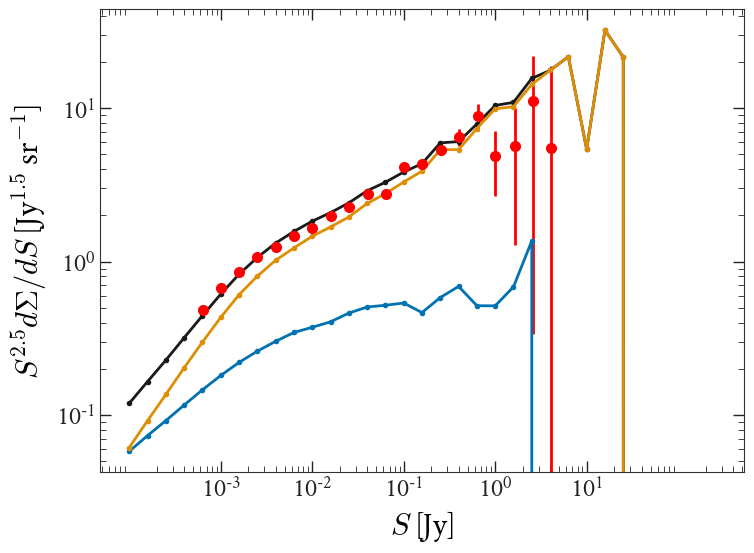

'Cochineal-Roman.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


In [50]:
##
plt.figure(figsize=(8,6))

bins = (range(-4.1, stop=2.5, step=0.2));
mids = (bins[2:end] .+ bins[1:end-1]) ./ 2.0

flux_I, redshift_I, θ_I, ϕ_I, flux_II, redshift_II, θ_II, ϕ_II = paint!(
    m, 145f9, radio_model, sources, return_fluxes=true)
count_I = fit(Histogram, log10.(flux_I), bins).weights
count_II = fit(Histogram, log10.(flux_II), bins).weights

Sehgal = readdlm("../examples/data/sehgal_fig9_145GHz.txt", ',', Float64, '\n');
errorbar(Sehgal[:,1], Sehgal[:,2], yerr=sqrt.(Sehgal[:,2]) .* Sehgal[:,1].^(2.5/2), marker="o", color="r",
    ls="None",label="Sehgal 145 GHz")

plot(10 .^ mids, (count_I .+ count_II) .* (10 .^ mids) .^ 2.5 ./ diff(10 .^ bins) / (4π), label = "total")
plot(10 .^ mids, count_I .* (10 .^ mids) .^ 2.5 ./ diff(10 .^ bins) / (4π), label = "I")
plot(10 .^ mids, count_II .* (10 .^ mids) .^ 2.5 ./ diff(10 .^ bins) / (4π), label = "II")

yscale("log")
xscale("log")
xlabel("\$ S \$ [Jy]")
ylabel("\$ S^{2.5} d\\Sigma / dS \$ [Jy\$^{1.5}\$ sr\$^{-1}\$]")
xticks(10 .^ [-3.,-2.,-1.,0.,1.])
# legend()
tight_layout()

savefig("sehgal_compare_145GHz.pdf")